# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [250]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


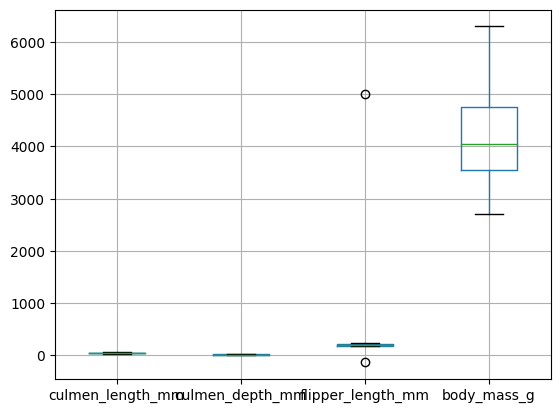

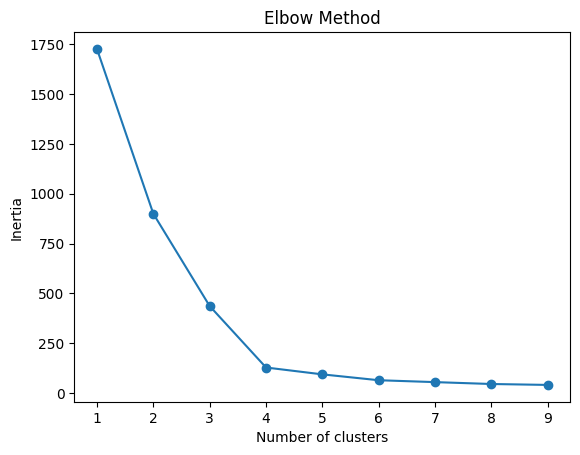

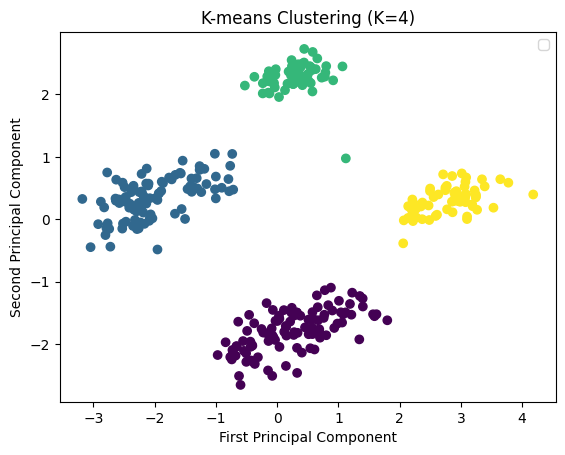

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984


In [251]:
# Run Solution code here to fix bugs

# Step 1 - Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()
penguins_df.info()

# Step 2 - Dealing with null values and outliers
penguins_df.boxplot()  
plt.show()
penguins_df = penguins_df.dropna()
penguins_df[penguins_df['flipper_length_mm']>4000]
penguins_df[penguins_df['flipper_length_mm']<0]
penguins_clean = penguins_df.drop([9,14])

# Step 3 - Perform preprocessing steps on the dataset to create dummy variables
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)

# Step 4 - Perform preprocessing steps on the dataset - scaling
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head(10)

# Step 5 - Perform PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components=sum(dfx_pca.explained_variance_ratio_>0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

# Step 6 - Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

# Step 7 - Run the k-means clustering algorithm
# with the optimal number of clusters 
# and visualize the resulting clusters.
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

# Step 8 - Create a final statistical DataFrame for each cluster.
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

# 1. Perform preprocessing steps on the data set - scaling

In [252]:
# Info
print(penguins_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 23.8+ KB
None


## EDA

In [253]:
# Check for missing values
print(penguins_df.isna().sum().sort_values())

print("5% of the dataset is {}".format(int(len(penguins_df)*0.05)))

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
5% of the dataset is 16


In [254]:
# Describe the metrics
print(penguins_df.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        335.000000       335.000000         335.000000   335.000000
mean          43.988358        17.169552         214.355224  4209.179104
std            5.453430         1.971966         263.253508   803.633495
min           32.100000        13.100000        -132.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.550000        18.700000         213.000000  4787.500000
max           59.600000        21.500000        5000.000000  6300.000000


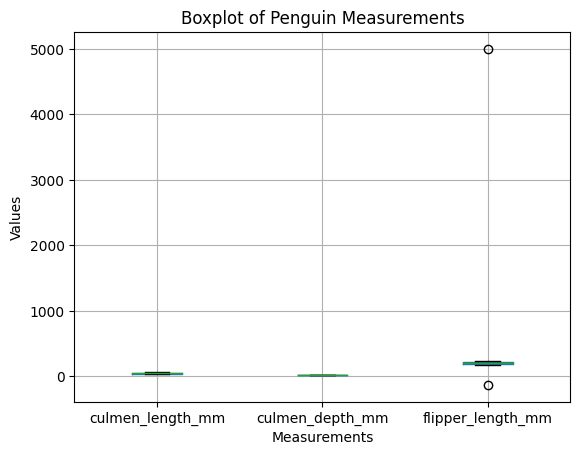

In [255]:
# Boxplot
penguins_df.boxplot(column=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"])

# Set the title and labels
plt.title("Boxplot of Penguin Measurements")
plt.xlabel("Measurements")
plt.ylabel("Values")

# Show the plot
plt.show()

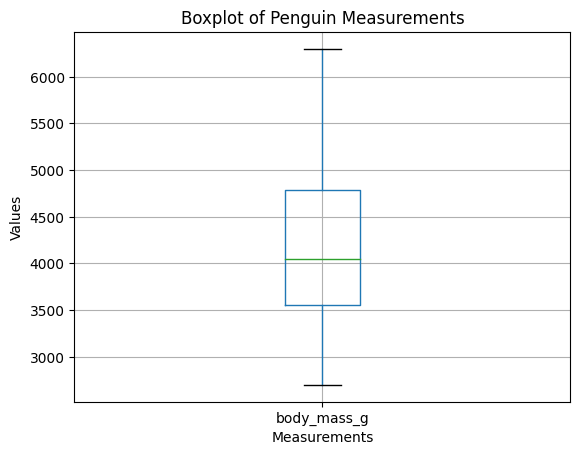

In [256]:
# Boxplot
penguins_df.boxplot(column=["body_mass_g"])

# Set the title and labels
plt.title("Boxplot of Penguin Measurements")
plt.xlabel("Measurements")
plt.ylabel("Values")

# Show the plot
plt.show()

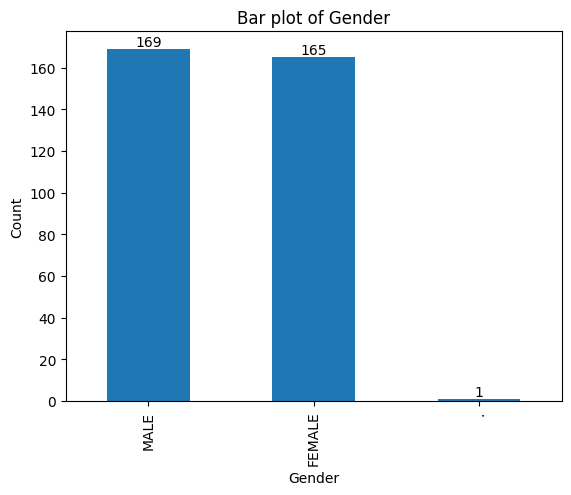

In [257]:
# Bar plot of Gender
gender_counts = penguins_df['sex'].value_counts(dropna=False)
ax = gender_counts.plot.bar()

# Add values on top of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title("Bar plot of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## Clean the Data Set

In [258]:
# Drop NA
penguins_df = penguins_df.dropna()

# Drop record where sex equals .
#penguins_clean = penguins_clean[penguins_clean['sex'] != '.']

# Check Info
print(penguins_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 23.8+ KB
None


In [259]:
# Describe
print(penguins_df.describe())

# Value Counts
print(penguins_df['sex'].value_counts(dropna=False))

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        335.000000       335.000000         335.000000   335.000000
mean          43.988358        17.169552         214.355224  4209.179104
std            5.453430         1.971966         263.253508   803.633495
min           32.100000        13.100000        -132.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.550000        18.700000         213.000000  4787.500000
max           59.600000        21.500000        5000.000000  6300.000000
MALE      169
FEMALE    165
.           1
Name: sex, dtype: int64


## Remove outliners

In [260]:
# Show outlier values
outliers = (penguins_df['flipper_length_mm']<0) | (penguins_df['flipper_length_mm']>4000)
print(penguins_df[outliers])

    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9               42.0             20.2             5000.0       4250.0  MALE
14              34.6             21.1             -132.0       4400.0  MALE


In [261]:
# Drop outliers
#penguins_clean = penguins_df[~outliers]
penguins_clean = penguins_df.drop([9,14])

# Check Info
print(penguins_clean.info())

# Describe
print(penguins_clean.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   333 non-null    float64
 1   culmen_depth_mm    333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex                333 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.6+ KB
None
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        333.000000       333.000000         333.000000   333.000000
mean          44.022523        17.148649         201.024024  4208.483483
std            5.444308         1.958940          14.042299   805.978992
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  405

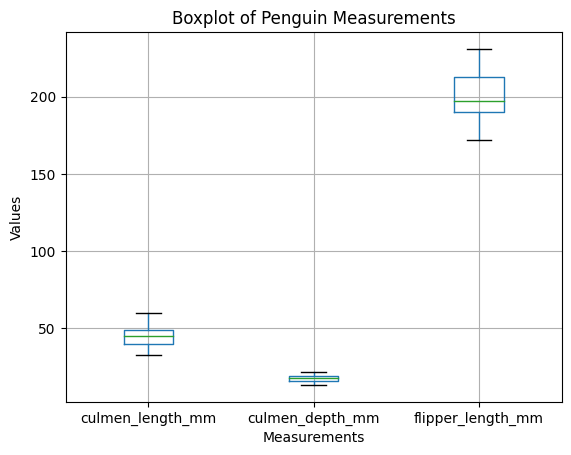

In [262]:
# Boxplot
penguins_clean.boxplot(column=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"])

# Set the title and labels
plt.title("Boxplot of Penguin Measurements")
plt.xlabel("Measurements")
plt.ylabel("Values")

# Show the plot
plt.show()

## Create dummy variables

In [263]:
# Apply one-hot encoding on the sex column
penguins_clean = pd.get_dummies(penguins_clean, columns=["sex"], drop_first=True)

# Print Info
print(penguins_clean.info())

# Check the updated dataframe
penguins_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   333 non-null    float64
 1   culmen_depth_mm    333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex_FEMALE         333 non-null    uint8  
 5   sex_MALE           333 non-null    uint8  
dtypes: float64(4), uint8(2)
memory usage: 13.7 KB
None


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


## Scale the Data

In [264]:
# Scale the data
scaler = StandardScaler()

penguins_preprocessed = pd.DataFrame(scaler.fit_transform(penguins_clean), columns = penguins_clean.columns)


In [265]:
print(penguins_preprocessed.info())

print(penguins_preprocessed.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   333 non-null    float64
 1   culmen_depth_mm    333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex_FEMALE         333 non-null    float64
 5   sex_MALE           333 non-null    float64
dtypes: float64(6)
memory usage: 15.7 KB
None
   culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0         -0.905520         0.793126  ...   -0.991031  0.997001
1         -0.831938         0.128503  ...    1.009050 -1.003008
2         -0.684775         0.435252  ...    1.009050 -1.003008
3         -1.347011         1.099875  ...    1.009050 -1.003008
4         -0.868729         1.764498  ...   -0.991031  0.997001

[5 rows x 6 columns]


# PCA

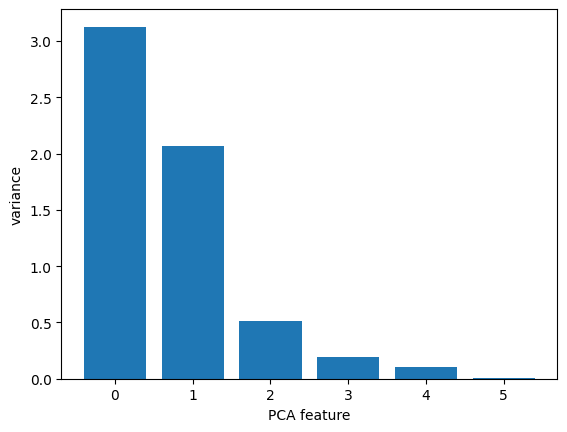

In [266]:
# Insantinate PCA
pca = PCA()

# Fit PCA
pca.fit(penguins_preprocessed)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [267]:
# Explain Variance Ratio
n_components = sum(pca.explained_variance_ratio_ > 0.1)

print(f"The optimal number of compents are {n_components}.")

The optimal number of compents are 2.


In [268]:
# Rerun PCA with Optimal Number of Components
pca = PCA(n_components = n_components)

# Fit and Transform
penguins_PCA = pd.DataFrame(pca.fit_transform(penguins_preprocessed))

# Info and head
print(penguins_PCA.info())
print(penguins_PCA.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       333 non-null    float64
 1   1       333 non-null    float64
dtypes: float64(2)
memory usage: 5.3 KB
None
          0         1
0 -0.729521 -2.097192
1 -1.929304  0.412150
2 -1.953525  0.308485
3 -2.288178 -0.158278
4 -0.621822 -2.514020


# Detect Optimal Number of Clusters for k-means

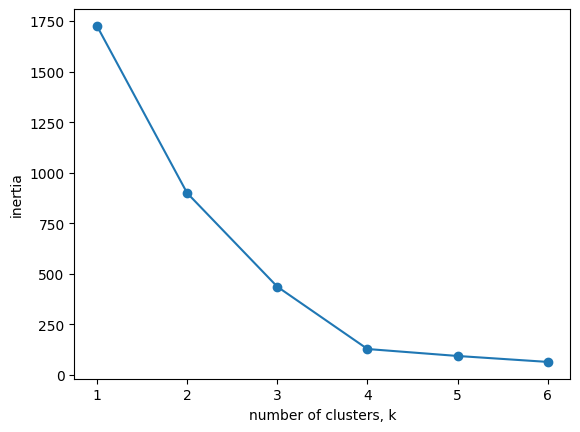

In [269]:
# Evaluate the KMeans by inertia metric

ks = range(1, 7)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit model to samples
    model.fit(penguins_PCA)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [270]:
# Select optimal number of clusters
n_clusters = 4

# Run the k-means clustering algorthm

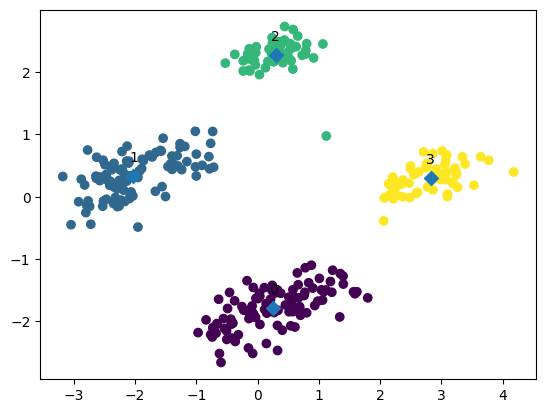

In [271]:
import numpy as np

# Apply Kmeans on the optimal number of clusters
model = KMeans(n_clusters=n_clusters, random_state=42)

kmeans = model.fit(penguins_PCA)

# Visualize
xs = penguins_PCA.loc[:, 0]
ys = penguins_PCA.loc[:, 1]
plt.scatter(xs, ys, c=kmeans.labels_)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

# Make a scatter plot of centroids_x and centroids_y with cluster labels
plt.scatter(centroids_x, centroids_y, marker='D', s=50)

# Annotate cluster labels at the centroids
for i, label in enumerate(np.unique(kmeans.labels_)):
    if i < len(centroids_x) and i < len(centroids_y):
        plt.annotate(label, (centroids_x[i], centroids_y[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

# Create final statustucal DaatFrame for each cluster

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   333 non-null    float64
 1   culmen_depth_mm    333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex_FEMALE         333 non-null    uint8  
 5   sex_MALE           333 non-null    uint8  
 6   cluster_label      333 non-null    int32  
dtypes: float64(4), int32(1), uint8(2)
memory usage: 15.0 KB
None


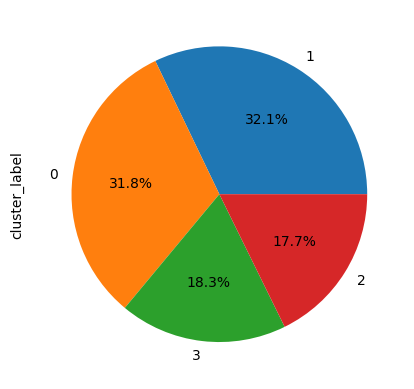

In [272]:
# Apply the labels to the penguins_clean dataframe
penguins_clean['cluster_label'] = kmeans.labels_

# Info
print(penguins_clean.info())

# Count clusters
cluster_counts = penguins_clean['cluster_label'].value_counts()
cluster_counts.plot.pie(autopct='%1.1f%%')
plt.show()

In [273]:
# Create final statistical dataframe
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','cluster_label']
stat_penguins = penguins_clean[numeric_columns].groupby('cluster_label').mean()

stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
cluster_label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984
